## Multivariate Time Series Forecasting using RNN (LSTM)
- https://medium.com/mlearning-ai/multivariate-time-series-forecasting-using-rnn-lstm-8d840f3f9aa7

In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

#### Timeseries Multivariant Forecasting with LSTM model
- Forecasting Load on Temp, Humidity, Wind and Precipitation.
- Train a LSTM model using hourly records from 2015 to 2019. 
- Then predict the future demand for Jan-2020 and Compare with actual data 

In [52]:
df1 = pd.read_excel('LSTM.xlsx')[['Data','TJLP','TAXA_JUROS','SPREAD','ICC']]

In [53]:
print(df1.dtypes)

Data          datetime64[ns]
TJLP                 float64
TAXA_JUROS           float64
SPREAD               float64
ICC                  float64
dtype: object


In [54]:
df1.shape

(124, 5)

In [55]:
## Splitting the database
#df1.rename(columns={'date':'Date','open':'Open','high':'High','low':'Low','close':'Close'},inplace=True)
#df1.drop(columns=['vol_fiat','volume','Unnamed: 0','unix'],inplace=True,axis=1)

In [56]:
## Splitting the database
df2       = df1[['Data','SPREAD','TJLP','TAXA_JUROS','ICC']]
df2_date  = df1[['Data']]
df2_train = df2.iloc[0:100,1:]

In [57]:
df2_train.head()

,SPREAD,TJLP,TAXA_JUROS,ICC
0,2.97,5.0,7.140410,8.72
1,2.83,5.0,6.945279,8.66
2,2.87,5.0,6.961950,8.56
3,2.67,5.0,6.516798,8.48
4,2.51,5.0,6.334514,8.37


In [58]:
## Splitting the database
df2_test = df2.iloc[100: , 1:]

In [59]:
df2       = df1[['Data','SPREAD','TJLP','TAXA_JUROS','ICC']]
df2_date  = df1[['Data']]

In [60]:
df2.isnull().sum()

Data          0
SPREAD        0
TJLP          0
TAXA_JUROS    0
ICC           0
dtype: int64

In [61]:
#df['datetime']=pd.to_datetime(df['datetime'])
print('treino:',df2_train.shape,'teste:',df2_test.shape)

treino: (100, 4) teste: (24, 4)


In [62]:
df2_test.reset_index(inplace=True)
df2_test.head()

,index,SPREAD,TJLP,TAXA_JUROS,ICC
0,100,3.84,4.61,7.967241,8.13
1,101,3.80,4.61,9.098656,8.11
2,102,4.04,4.88,9.781375,8.12
3,103,3.90,4.88,10.797634,8.10
4,104,3.73,4.88,9.995535,8.10


In [63]:
sc = StandardScaler()
df2_train_scaled = sc.fit_transform(df2_train)

sc2 = StandardScaler()
df2_train_scaled_y = sc2.fit_transform(df2_train[['SPREAD']])

print("Treino X:", df2_train_scaled.shape, "Treino y:", df2_train_scaled_y.shape)

Treino X: (100, 4) Treino y: (100, 1)


#####  Create an array for the previous values for each column.

In [64]:
hops = 6
no_records = df2_train_scaled.shape[0]
ncols = 4
X_train = []
y_train = []

for i in  range(14,no_records):
    X_train.append(df2_train_scaled[i-6:i])
    y_train.append(df2_train_scaled_y[i][0])

X_train , y_train = np.array(X_train,dtype=object) , np.array(y_train,dtype=object)

In [65]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [66]:
print("shape df2_train:", df2_train.shape, "shape df2_train_scaled:", df2_train_scaled.shape)

shape df2_train: (100, 4) shape df2_train_scaled: (100, 4)


In [67]:
X_train_shape = np.reshape(X_train, (X_train.shape[0] , X_train.shape[1], X_train.shape[2]) )

In [68]:
print("Treino X:", X_train.shape, "Treino y:", y_train.shape)

Treino X: (86, 6, 4) Treino y: (86,)


#### The Most Important part...
- Past values are import to predict the future demand 
- Model has to be dynamic to learn from past data and predict the future demand.
- Create parts of data having past 2 days (48 hours) 
- LSTM model will predict the 49th Hour Load prediction.

### Creating a LSTM Multivariant model
- Multistage Neural Network (Long Short Term Memory). 

In [154]:
model = Sequential()
model.add(LSTM(units=75, activation='relu', input_shape=(6, 4), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=75))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.compile(optimizer='adam', loss='mse')

In [155]:
history = model.fit(X_train_shape, y_train, epochs=50, batch_size=75, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 7ms/step - loss: 0.7479
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 0.7197
Epoch 3/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6909
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 0.6580
Epoch 5/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6226
Epoch 6/50
2/2 [==============================] - 0s 10ms/step - loss: 0.5828
Epoch 7/50
2/2 [==============================] - 0s 9ms/step - loss: 0.5344
Epoch 8/50
2/2 [==============================] - 0s 12ms/step - loss: 0.4980
Epoch 9/50
2/2 [==============================] - 0s 17ms/step - loss: 0.4825
Epoch 10/50
2/2 [==============================] - 0s 10ms/step - loss: 0.4696
Epoch 11/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4999
Epoch 12/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4916
Epoch 13/50
2/2 [==============================] - 0s 8ms/step - l

In [156]:
df1_test_last14 = df2_train.iloc[-6:]
df1_test_full   = df2_test

full_df = pd.concat( (df1_test_last14 , df1_test_full), axis=0)
full_df.drop(columns=['index'],axis=1,inplace=True)

In [157]:
print(full_df.shape)

(30, 4)


In [158]:
full_df.head()

,SPREAD,TJLP,TAXA_JUROS,ICC
94,4.31,4.55,8.332769,8.25
95,4.92,4.55,10.872737,8.25
96,4.46,4.39,10.144571,8.23
97,4.59,4.39,8.822841,8.20
98,4.21,4.39,8.716562,8.18


In [159]:
full_df = sc.transform(full_df)
print(full_df.shape)

(30, 4)


#### Reshaping the test data frame in similar way as we did for training dataset.

In [160]:
hops = 6
no_records = 30
ncols = 4
X_train_shape_pred = []


for i in  range(6,no_records):
    X_train_shape_pred.append(full_df[i-6:i])
    

X_train_shape_pred = np.array(X_train_shape_pred,dtype=object)

In [161]:
print('size teste:',df2_test.shape)

size teste: (24, 5)


In [162]:
print("shape:", X_train_shape_pred.shape , "length:",len(X_train_shape_pred))

shape: (24, 6, 4) length: 24


In [163]:
X_train_shape_pred = np.asarray(X_train_shape_pred).astype(np.float32)

ytest = model.predict(X_train_shape_pred)

1/1 [==============================] - 1s 640ms/step


In [164]:
#X_train_shape_pred

In [165]:
ytest_final_pred = sc2.inverse_transform(ytest)
print(ytest_final_pred.shape)


(24, 10)


In [166]:
print(ytest_final_pred[:,0])

[4.037071  3.9715908 3.9120164 3.883671  3.781357  3.774     3.774
 3.774     3.774     3.774     3.774     3.774     3.8181164 3.931697
 4.0804477 4.262332  4.3805323 4.4424953 4.343439  4.336755  4.3527718
 4.2610865 4.4140906 4.5609975]


In [167]:
final_open_pred = pd.DataFrame(ytest_final_pred[:,0])
final_open_pred.columns=['SPREAD_pred']

In [168]:
final_open_pred.head()

,SPREAD_pred
0,4.037071
1,3.971591
2,3.912016
3,3.883671
4,3.781357


In [169]:
fully_final = pd.concat( (final_open_pred , df2_test ), axis=1)

In [170]:
fully_final.shape

(24, 6)

In [171]:
fully_final.head()

,SPREAD_pred,index,SPREAD,TJLP,TAXA_JUROS,ICC
0,4.037071,100,3.84,4.61,7.967241,8.13
1,3.971591,101,3.80,4.61,9.098656,8.11
2,3.912016,102,4.04,4.88,9.781375,8.12
3,3.883671,103,3.90,4.88,10.797634,8.10
4,3.781357,104,3.73,4.88,9.995535,8.10


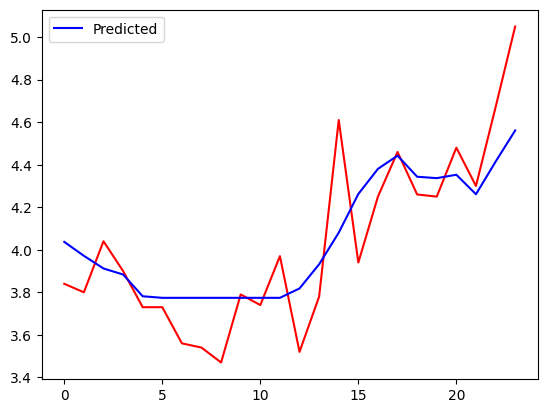

In [172]:
plt.plot(fully_final['SPREAD']      , color='red')
plt.plot(fully_final['SPREAD_pred'] , color='blue', label='Predicted')
plt.legend()

In [183]:
import numpy as np
from scipy.optimize import fsolve

fv = 0
pv = 200000
rate = 0.075 / 12
nper = 15 * 12

def f(pmt):
  return fv + pv*(1 + rate)**nper + pmt*(1 + rate*0) / rate*((1 + rate)**nper - 1)

pmt_amt = fsolve(f, [1000], xtol=0.000001)
print(pmt_amt)

[-1854.02472001]


In [ ]:
#Aplicação em Flask
#https://ron.sh/calculating-amortization-with-python/

In [ ]:
import pandas as pd
import numpy as np
from datetime import date
Define the variables for the mortgage:

Interest_Rate = 0.04
Years = 30
Payments_Year = 12
Principal = 200000
Addl_Princ = 50
start_date = (date(2016,1,1))
Now, let’s play with the basic formulas so we understand how they work. Calculating the total payment requires us to pass the right values to the numpy pmt function.

pmt = np.pmt(Interest_Rate/Payments_Year, Years*Payments_Year, Principal)